# Get Start

This is a Turtorial to show the basic usage of BRICK

# Configure Knowledge Graph

The very first thing to do is add the link and authoriz to Neo4j Knowledge Graph of BRICK 

In [1]:
import BRICK

url = "neo4j://10.224.28.66:7687"
auth = ("neo4j", "bmVvNGpwYXNzd29yZA==")  

BRICK.config(url=url, auth=auth)

# Query Graph

Now, you can query graph with a Neo4j Cypher. We provided two kind of return. For the return object, we provided both pandas DataFrame and networkx MultiDiGraph. With default, query will return a dataframe

### pandas DataFrame

In [2]:
df = BRICK.qr.query_cypher('MATCH path=(n)-[r]-(m) RETURN path LIMIT 10')
df.head(3)

,path.0.def,path.0.id,path.0.name,path.0.synonym,path.0.type,path.1,path.1.condition,path.1.info_source,path.1.info_source_length,path.1.original_relation,path.1.relation,path.1.relation_confidence,path.2.def,path.2.id,path.2.name,path.2.synonym,path.2.type
0,CCAAT/enhancer binding protein epsilon<loc>:14...,NCBI:110794,Cebpe,C/EBPe|C/EBPepsilon|CRP1|Gm294,Gene,marker_of,[Undef],[Cell_Taxonomy:OnClass:PMID:34548483],1,[marker_of],marker_of,[1],A cultured cell that is freshly isolated from ...,CL:0000001,primary cultured cell,primary cell culture cell|primary cell line ce...,Cell
1,A cultured cell that is freshly isolated from ...,CL:0000001,primary cultured cell,primary cell culture cell|primary cell line ce...,Cell,marker_of,[Undef],[Cell_Taxonomy:OnClass:PMID:34548483],1,[marker_of],marker_of,[1],CCAAT/enhancer binding protein epsilon<loc>:14...,NCBI:110794,Cebpe,C/EBPe|C/EBPepsilon|CRP1|Gm294,Gene
2,chitinase-like 3<loc>:3 F2.2|3 46.49 cM<xref>E...,NCBI:12655,Chil3,Chi3l3|ECF-L|Ym1,Gene,marker_of,[Undef],[Cell_Taxonomy:OnClass:PMID:34548483],1,[marker_of],marker_of,[1],A cultured cell that is freshly isolated from ...,CL:0000001,primary cultured cell,primary cell culture cell|primary cell line ce...,Cell


### networkx MultiDiGraph

In [3]:
nxg = BRICK.qr.query_cypher('MATCH path=(n)-[r]-(m) RETURN path LIMIT 10', return_type='graph')
nxg.nodes()

NodeView(('NCBI:110794', 'CL:0000001', 'NCBI:12655', 'NCBI:12796', 'NCBI:14134', 'NCBI:16415'))

## Specific query
Query with cypher ensure the flexibility of analysis, while a few commonly used query have been predefined for downstreaming analysis.

### query relations between a set of entity.
this function aims to figure out the relation between nodes from a set of entities. i.e. when qurey regulation among a Gene set, is typically as Gene Regulatory Network task.

In [4]:
BRICK.qr.query_relation(['Cd4', 'Cd8', 'Cd68', 'T cell', 'macrophage'], entity_type=['Cell','Gene'], relation='marker_of', directed=True)

,path.0.def,path.0.id,path.0.name,path.0.synonym,path.0.type,path.1,path.1.condition,path.1.info_source,path.1.info_source_length,path.1.original_relation,path.1.relation,path.1.relation_confidence,path.2.def,path.2.id,path.2.name,path.2.synonym,path.2.type
0,CD4 antigen<loc>:6 F2|6 59.17 cM<xref>ENSEMBL:...,NCBI:12504,Cd4,L3T4|Ly-4,Gene,marker_of,"[UBERON:0001155,DOID:162, UBERON:0000947, UBER...","[PanglaoDB, Cell_Taxonomy:CellMarker:PMID:1114...",45,"[marker_of, marker_of, marker_of, marker_of, m...",marker_of,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",A type of lymphocyte whose defining characteri...,CL:0000084,T cell,immature T cell|mature T cell|T lymphocyte|T-c...,Cell
1,CD68 antigen<loc>:11 B3|11 42.86 cM<xref>ENSEM...,NCBI:12514,Cd68,Lamp4|Scard1|gp110,Gene,marker_of,"[UBERON:0001637, UBERON:0002240, UBERON:000092...","[PanglaoDB, Cell_Taxonomy:CellMarker,Invitroge...",52,"[marker_of, marker_of, marker_of, marker_of, m...",marker_of,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",A mononuclear phagocyte present in variety of ...,CL:0000235,macrophage,histiocyte,Cell


### query neighbors based on a set of entity.
this function implemented a set of gene or cell to find neighbor target entity. i.e. when qurey Cells related to a Gene set, is typically as annotation task.

In [5]:
cell_df = BRICK.qr.query_neighbor(['Cd4', 'Cd8', 'Cd68'], target_entity_type='Cell', relation='marker_of', directed=True)
cell_df.head(3)

,path.0.def,path.0.id,path.0.name,path.0.synonym,path.0.type,path.1,path.1.condition,path.1.info_source,path.1.info_source_length,path.1.original_relation,path.1.relation,path.1.relation_confidence,path.2.def,path.2.id,path.2.name,path.2.synonym,path.2.type
0,CD4 antigen<loc>:6 F2|6 59.17 cM<xref>ENSEMBL:...,NCBI:12504,Cd4,L3T4|Ly-4,Gene,marker_of,[UBERON:0002371],"[Cell_Taxonomy:CellMarker:PMID:27984734, CellM...",2,"[marker_of, marker_of]",marker_of,"[1, 1]",A stem cell from which all cells of the lympho...,CL:0000037,hematopoietic stem cell,blood forming stem cell|colony forming unit he...,Cell
1,CD68 antigen<loc>:11 B3|11 42.86 cM<xref>ENSEM...,NCBI:12514,Cd68,Lamp4|Scard1|gp110,Gene,marker_of,"[UBERON:0001255, UBERON:0002048, UBERON:000237...",[SCT000000802],1,[DEG_of],marker_of,[0.4198],A cell found predominately in the blood.<xref>...,CL:0000081,blood cell,Undef,Cell
2,CD4 antigen<loc>:6 F2|6 59.17 cM<xref>ENSEMBL:...,NCBI:12504,Cd4,L3T4|Ly-4,Gene,marker_of,"[UBERON:0001155,DOID:162, UBERON:0000947, UBER...","[PanglaoDB, Cell_Taxonomy:CellMarker:PMID:1114...",45,"[marker_of, marker_of, marker_of, marker_of, m...",marker_of,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",A type of lymphocyte whose defining characteri...,CL:0000084,T cell,immature T cell|mature T cell|T lymphocyte|T-c...,Cell


## visualization
we designed an interactive visualization implement with pyvis. When return a networkx Graph we can easily visualize it with BRICK.pl.module 

In [6]:
nxg = BRICK.qr.query_cypher('MATCH path=(n:Cell)-[r:is_a]->(m:Cell) RETURN path LIMIT 10', return_type='graph')

In [5]:
nt = BRICK.pl.interact_visualize_network(nxg, width =1000)
nt.show('nx.html',)

nx.html
nx.html


# Rank Graph

Knowledge graphs can always provide an excessive amount of information. Finding more important results from the query results is of great help for subsequent interpretation and analysis. Here, we provide X methods to calculate the score of the query results, thereby sorting or filtering the query results.

## enrichment

In [7]:
genelist = ["CD3D","CD45RA","CD4","IFNG","IL4","RORC","CD8A","GZMB","FOXP3"]

df = BRICK.qr.query_neighbor(genelist, source_entity_type='Gene', target_entity_type='Process', relation='participate_in')

df_count = BRICK.rk.enrich(df)

In [8]:
df_count.sort_values('pvalue').head()

,path.0.name,path.1.relation,path.1.info_source_length,path.2.id,path.2.name,path.2.type,path.2.match_count,path.2.background_count,pvalue
5,"[IL4, CD4, CD8A, FOXP3]","[participate_in, participate_in, participate_i...","[1, 1, 1, 1]",GO:0042110,T cell activation,Process,4,103,3.625007e-07
66,"[IL4, FOXP3]","[participate_in, participate_in]","[1, 1]",GO:0002677,negative regulation of chronic inflammatory re...,Process,2,6,6.280196e-06
60,"[IL4, FOXP3]","[participate_in, participate_in]","[1, 1]",GO:2000320,negative regulation of T-helper 17 cell differ...,Process,2,18,4.242876e-05
99,"[IFNG, IL4]","[participate_in, participate_in]","[1, 1]",GO:0045348,positive regulation of MHC class II biosynthet...,Process,2,21,5.643526e-05
78,"[IFNG, FOXP3]","[participate_in, participate_in]","[1, 1]",GO:0032700,negative regulation of interleukin-17 production,Process,2,25,7.818106e-05


## score1

## score2 

# Graph representive learning 

BRICK combine priori knowledge from Knowledge Graph with Omics data. Therefore a representive learning methods can therefore be utilized to figure out new findings other from knowledge graph.

### get omics data

D:\Anaconda\envs\LLM\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


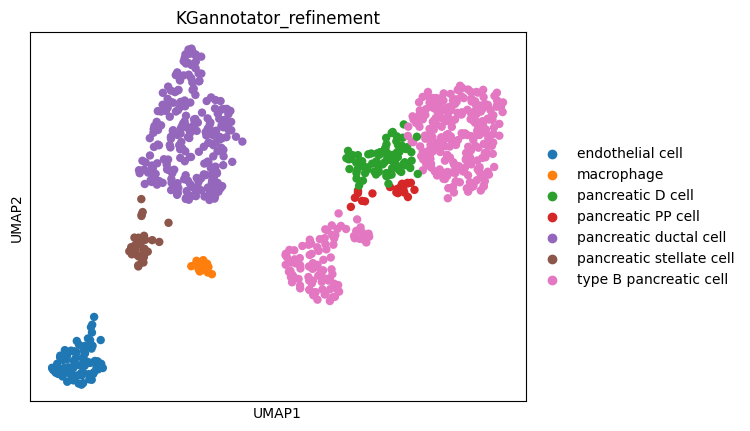

In [2]:
import scanpy as sc
adata = sc.read('../KG_annotation/adata_new1.h5ad')
sc.pl.umap(adata, color = 'KGannotator_refinement')

In [3]:
adata.X = adata.layers['lognorm'].copy()
sc.tl.rank_genes_groups(adata, groupby='KGannotator_refinement', pts=True)
BRICK.pp.rank_genes_groups2df(adata)

Here, we take macrophage as example, we get top 50 DEG of macrophage to query celltype

In [4]:
genelist = BRICK.pp.filter_marker(adata.uns['rank_genes_groups_df']['macrophage'], topgenenumber=50)
print(len(genelist))

50


In [5]:
df = BRICK.qr.query_neighbor(genelist, relation='marker_of', target_entity_type='Cell')
df_count = BRICK.rk.enrich(df)
df_count = df_count.loc[df_count['pvalue'] < 0.05]
adata_sub = adata[:, genelist]

In [6]:
nxg = BRICK.pp.combine_graph(adata_sub, df_count)
len(nxg.nodes)

880

In [7]:
model = BRICK.emb.GRACE_model(nxg)
model.fit(epoches=50)

(T): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  8.34it/s, loss=7.47]


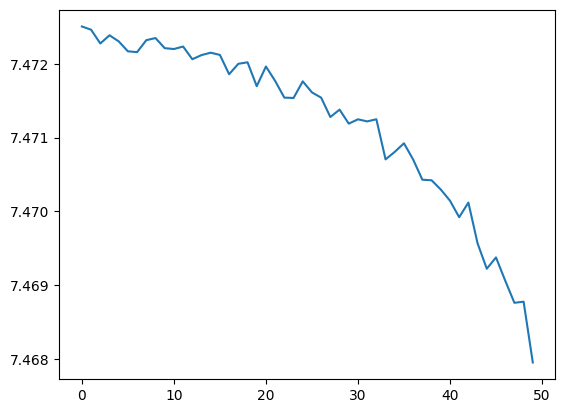

In [8]:
model.plot_loss()

D:\Anaconda\envs\LLM\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
D:\Anaconda\envs\LLM\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


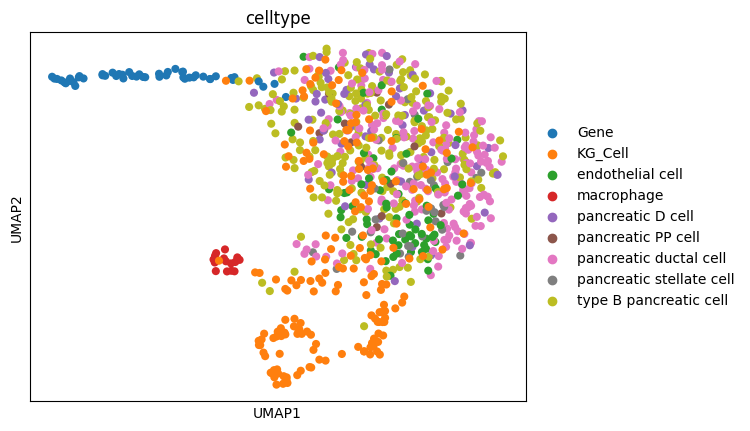

In [9]:
adata_graph = model.get_result()
name2celltype = dict(zip(adata.obs_names, adata.obs['KGannotator_refinement']))
adata_graph.obs['celltype'] = adata_graph.obs['type'].copy()
adata_graph.obs['celltype'] = adata_graph.obs['celltype'].astype(str)
adata_graph.obs.loc[adata_graph.obs.index.isin(name2celltype), 'celltype'] = [name2celltype[x] for x in adata_graph.obs.loc[adata_graph.obs.index.isin(name2celltype)].index ]
sc.pl.umap(adata_graph, color = 'celltype')       

# Get help from help module

### check all nodes types 

In [3]:
node_types = BRICK.help.check_nodes_type()
print(node_types)

['Publication', 'Other', 'Protein', 'Disease', 'Process', 'Tissue', 'Cell', 'Species', 'Chemical', 'Phenotype', 'Function', 'Cell_Component', 'Stage', 'Mutation', 'Gene', 'Pathway']


### check relation types 

this can be used to search possible relation between source and target. source_entity_type and target_entity_type can be str or list. If None with default, this function will qurey all nodes type.

In [4]:
relation_types = BRICK.help.check_relation_type(source_entity_type='Gene', target_entity_type='Cell')
relation_types.head()

,relationship_type,count
0,co_mentioned,583128
1,marker_of,216454
2,produce,165304


### check relation DB types 

this can be used to search possible Databases of a relation. You can also specify the source, relation and target type. the Databases can be used when query relations or neighbors.

In [5]:
relation_db_types = BRICK.help.check_relation_info_source(relation='is_a')
print(relation_db_types)

['UPHENO_ALL_WITH_RELATIONS', 'BTO', 'EFO', 'CHEBI', 'GO-PLUS', 'FOODON', 'UBERON', 'NBO', 'CELLLINEONTOLOGY', 'GENEPIO', 'CL', 'GENO', 'IDO', 'DOID', 'EMAPA', 'GO', 'HPO', 'KEGG', 'MA', 'MEDDRA', 'MESH', 'PSI_MI', 'MMUSDV', 'PSI_MOD', 'MONDO', 'MPHENO', 'MPATH', 'NCIT', 'OMIM', 'PATO', 'PW', 'RHEA', 'SNOMED_CT']
